<a href="https://colab.research.google.com/github/artnovob/Job-Postings-Clustering/blob/main/MLClastering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Creating a binary table with employment benefits
# 1 indicates the presence of a benefit, 0 indicates its absence
data = pd.DataFrame({


    "Official employment": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    "Welfare package": [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
    "Medical insurance": [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    "Flexible schedule": [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    "Remote": [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
    "Trainings": [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    "Family values": [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    "Social initiatives": [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    "Comfort conditions": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
    "Bonuses/rewards": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
})



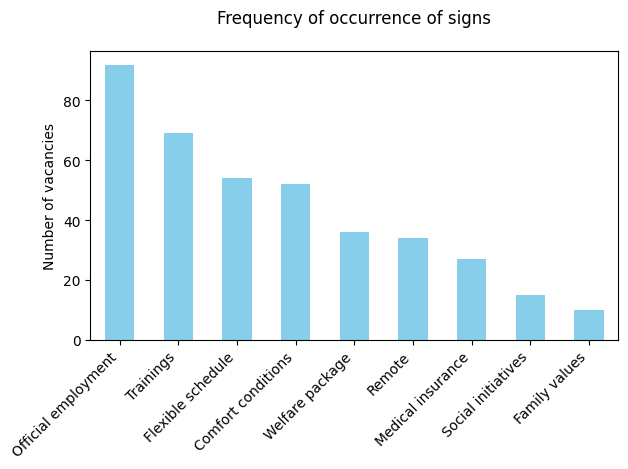

In [10]:
if 'cluster' in data.columns:
    data = data.drop('cluster', axis=1)

data_for_plot = data.iloc[:, :-1]

# Sorting values in descending order
sorted_data = data_for_plot.sum().sort_values(ascending=False)

# Plotting
sorted_data.plot(kind='bar', color='skyblue')
plt.title('Frequency of occurrence of signs', pad=20)
plt.ylabel('Number of vacancies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


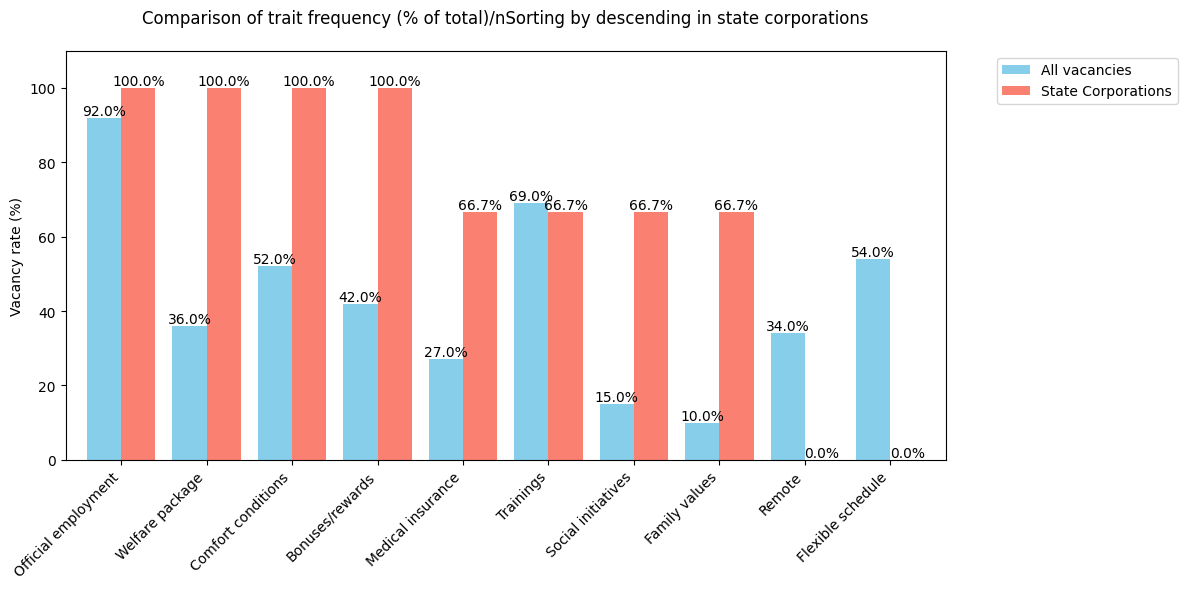

In [14]:
# Data preparation
if 'cluster' in data.columns:
  data = data.drop('cluster', axis=1)

# Take all columns except the last one (if it is not related to features)
features = data.iloc[:, :-1] if data.shape[1] > 10 else data

# Percentage for all jobs
total_percent = (features.mean() * 100).round(1)

# Companies_data
companies_data = pd.DataFrame({
    'Official employment': [1, 1, 1],
    'Welfare package': [1, 1, 1],
    'Medical insurance': [1, 1, 0],
    'Flexible schedule': [0, 0, 0],
    'Remote': [0, 0, 0],
    'Trainings': [0, 1, 1],
    'Family values': [0, 1, 1],
    'Social initiatives': [0, 1, 1],
    'Comfort conditions': [1, 1, 1],
    'Bonuses/rewards': [1, 1, 1]
})

# Percentage ratio for state corporations
companies_percent = (companies_data.mean() * 100).round(1)

# Create DataFrame for visualization and sorting
plot_data = pd.DataFrame({
    'All vacancies': total_percent,
    'State Corporations': companies_percent
}).sort_values('State Corporations', ascending=False)

# Plot the graph
ax = plot_data.plot(kind='bar', figsize=(12, 6),
                   color=['skyblue', 'salmon'], width=0.8)

plt.title('Comparison of trait frequency (% of total)/nSorting by descending in state corporations', pad=20)
plt.ylabel('Vacancy rate (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 110)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

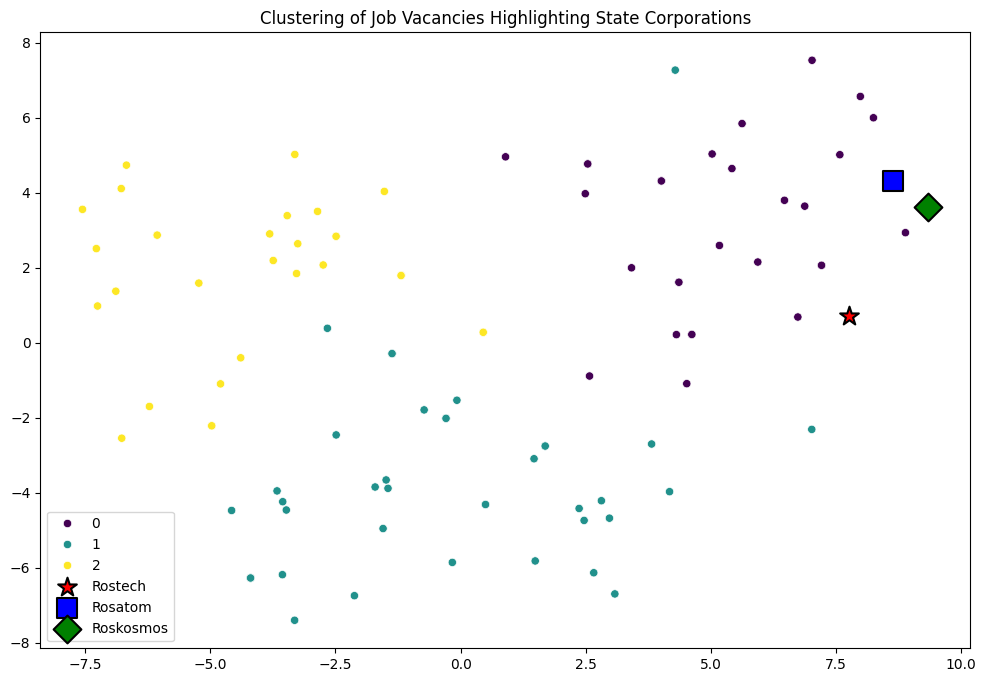

In [37]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

data = pd.DataFrame({
    "Official Employment": [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1],
    "Social Package": [1,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1],
    "Medical Insurance": [1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0],
    "Flexible Schedule": [0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,0,1,1,1,0,1,1,1],
    "Remote Work": [0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0],
    "Training": [1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1],
    "Family Values": [0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    "Social Initiatives": [0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    "Comfortable Conditions": [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1],
    "Bonuses/Rewards": [1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,1]
})

# Data on state companies
companies = pd.DataFrame({
    'Company': ['Rostech', 'Rosatom', 'Roskosmos'],
    'Official Employment': [1, 1, 1],
    'Social Package': [1, 1, 1],
    'Medical Insurance': [1, 1, 0],
    'Flexible Schedule': [0, 0, 0],
    'Remote Work': [0, 0, 0],
    'Training': [0, 1, 1],
    'Family Values': [0, 1, 1],
    'Social Initiatives': [0, 1, 1],
    'Comfortable Conditions': [1, 1, 1],
    'Bonuses/Rewards': [1, 1, 1]
})

# Combine data
all_data = pd.concat([data, companies.drop('Company', axis=1)], ignore_index=True)

# Dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(all_data)

# Clustering (only for initial data)
kmeans = KMeans(n_clusters=3).fit(data)
clusters = list(kmeans.labels_) + [4, 4, 4]  # 4 - special cluster for companies
all_data['cluster'] = clusters

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:-3, 0], y=X_tsne[:-3, 1], hue=all_data['cluster'][:-3], palette='viridis', legend='full')

# Add companies with different markers and colors
markers = ['*', 's', 'D']  # different markers for each company
colors = ['red', 'blue', 'green']  # different colors

for i, (company, marker, color) in enumerate(zip(companies['Company'], markers, colors)):
    idx = len(all_data) - 3 + i
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1],
               marker=marker, s=200, color=color,
               label=company, edgecolors='black', linewidth=1.5)

plt.title('Clustering of Job Vacancies Highlighting State Corporations')
plt.legend()

plt.show()
